In [1]:
## importing required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\adil2\\Downloads\\global-power-plant-database-master\\global-power-plant-database-master\\source_databases_csv\\database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.shape

(908, 25)

In [5]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
#checking null values in the dataset
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
#checking the number of columns in the dataset
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
#Dropping the unwanted columns and the columns which has 100% per null values and some of the objects columns which are unwanted
df = df.drop(columns = ['country','country_long','name','gppd_idnr','owner','wepp_id','source','url','geolocation_source','geolocation_source','generation_data_source','other_fuel1','other_fuel2','year_of_capacity_data','other_fuel2','other_fuel3','estimated_generation_gwh'])

In [9]:
#checking the shape of the dataset
df.shape

(908, 10)

In [10]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [11]:
#Dataset Description
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [12]:
#using LabelEncoder for transforming the string values into numerical values
le = LabelEncoder()

In [13]:
df1 =le.fit_transform(df['primary_fuel'])
pd.Series(df1)
df['primary_fuel'] = df1

In [14]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [15]:
#Dataset which contains zero's minimum values need to replace with mean value of each columns
df['capacity_mw'] = df['capacity_mw'].replace(0,df['capacity_mw'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].replace(0,df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())

In [16]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,908.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.399953,21.196189,77.447848,3.205947,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
std,580.123724,6.248627,4.907260,2.281339,17.047817,3754.099775,3958.526726,4133.882315,4096.448829,4125.377713
min,1.000000,8.168900,68.644700,0.000000,1927.000000,0.019900,0.045355,0.118300,0.099500,0.425769
25%,16.987500,16.771575,74.258975,1.000000,1988.000000,316.365225,359.139800,286.410750,283.200000,289.404450
50%,60.000000,21.778300,76.719250,3.000000,2000.000000,1045.236500,1204.119150,1144.014052,1242.764950,1329.966750
75%,388.125000,25.516375,79.441475,6.000000,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [17]:
# Dataset contains null values need to transform with mean value of column using SimpleImputer
imp = SimpleImputer(strategy = 'mean')
impu =imp.fit_transform(df)
df_new = pd.DataFrame(impu,columns = df.columns)

In [18]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,135.0,23.8712,91.3602,2.0,2004.000000,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1.0,2015.000000,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [19]:
#checking null values removed
df_new.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

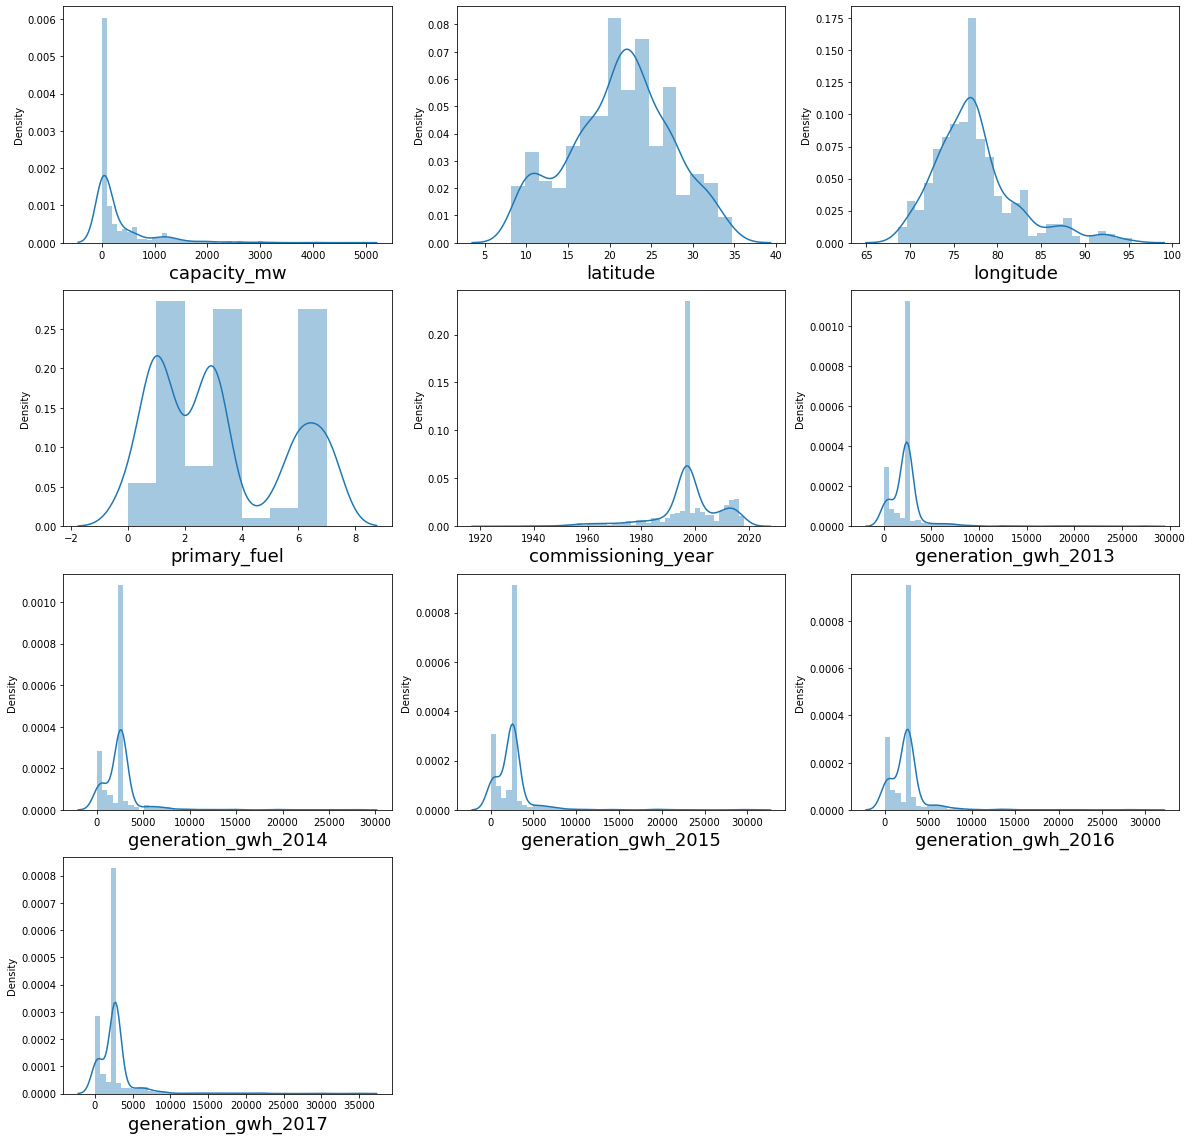

In [20]:
## plotting box plot to check the skewness and outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df_new:
    if plt_num<=20:
        sx = plt.subplot(4,3,plt_num)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

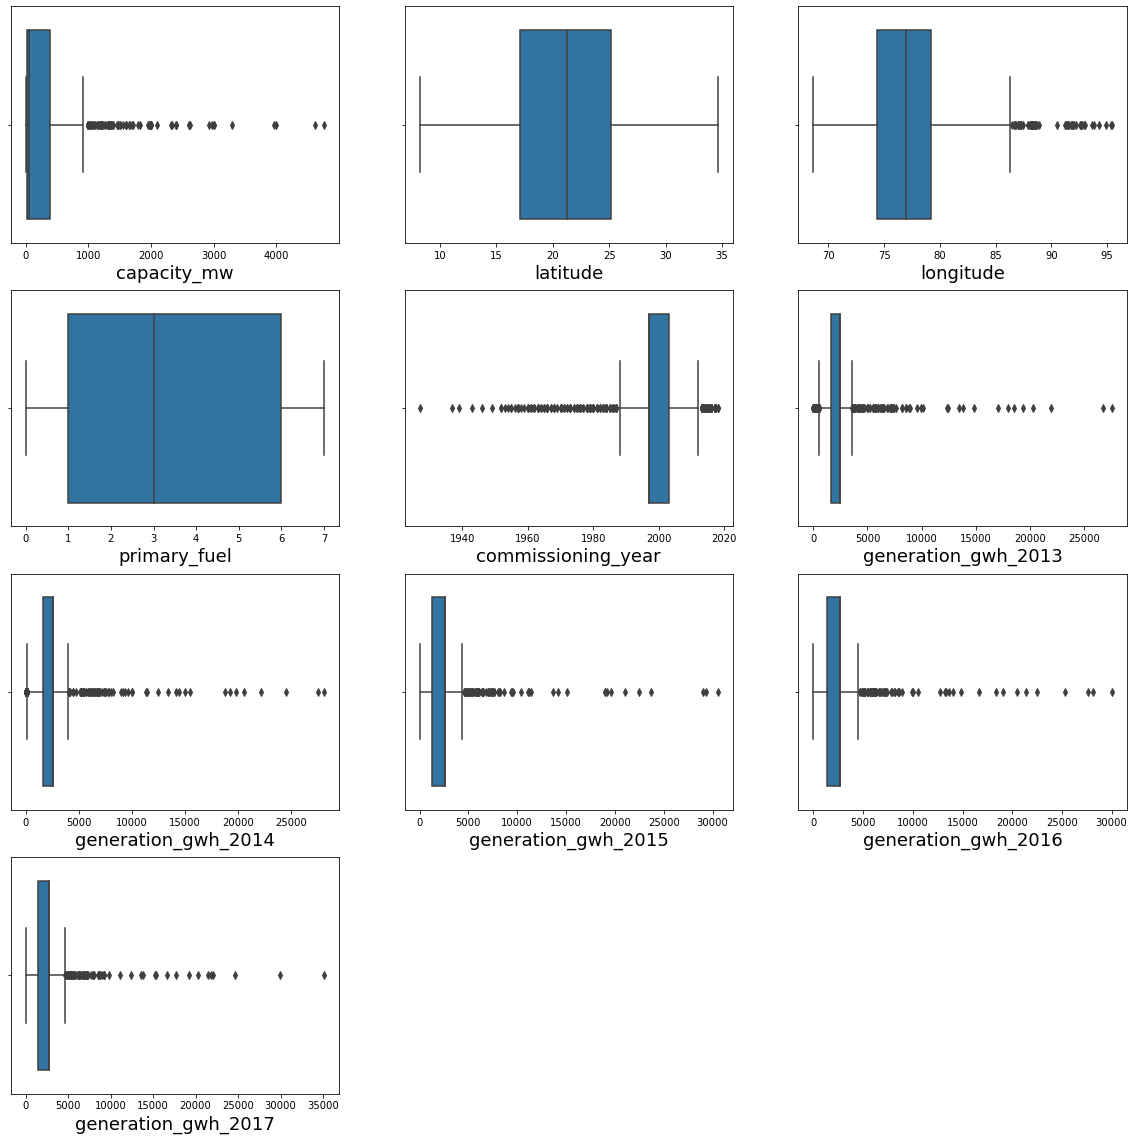

In [21]:
## plotting box plot to check the skewness and outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df_new:
    if plt_num<=20:
        sx = plt.subplot(4,3,plt_num)
        sns.boxplot(df_new[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

In [22]:
##finding the outliers 
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
iqr = q3- q1

In [23]:
iqr

capacity_mw             371.137500
latitude                  8.125950
longitude                 4.821350
primary_fuel              5.000000
commissioning_year        6.123106
generation_gwh_2013     766.228389
generation_gwh_2014     978.658086
generation_gwh_2015    1281.171829
generation_gwh_2016    1289.918977
generation_gwh_2017    1290.882087
dtype: float64

In [24]:
# Removing outliers in the capacity_mw columns
cap = (q3.capacity_mw + (0.5 * iqr.capacity_mw))
cap

index = np.where(df_new['capacity_mw']>cap)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,3,135.0,23.8712,91.3602,2.0,2004.000000,631.777928,617.789264,843.747000,886.004428,663.774500
4,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
...,...,...,...,...,...,...,...,...,...,...,...
731,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
732,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
733,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
734,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [25]:
# Removing outliers in the longitude columns
long = (q3.longitude + (1.5 * iqr.longitude))
long

index = np.where(df_new['longitude']>long)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...
685,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
686,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
687,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
688,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [26]:
# Removing outliers in the commissioning_year columns
com= (q3.commissioning_year + (1.5 * iqr.commissioning_year))
com

index = np.where(df_new['commissioning_year']>com)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...
645,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
646,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
647,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
648,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [27]:
# Removing outliers in the generation_gwh_2013 columns
long = (q3.generation_gwh_2013 + (1.5 * iqr.generation_gwh_2013))
long

index = np.where(df_new['generation_gwh_2013']>long)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...
643,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
644,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
645,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
646,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [28]:
# Removing outliers in the generation_gwh_2014 columns
long = (q3.generation_gwh_2014 + (1.5 * iqr.generation_gwh_2014))
long

index = np.where(df_new['generation_gwh_2014']>long)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...
643,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
644,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
645,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
646,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [29]:
# Removing outliers in the generation_gwh_2015 columns
long = (q3.generation_gwh_2015 + (1.5 * iqr.generation_gwh_2015))
long

index = np.where(df_new['generation_gwh_2015']>long)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...
643,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
644,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
645,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
646,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [30]:
# Removing outliers in the generation_gwh_2016 columns
long = (q3.generation_gwh_2016 + (1.5 * iqr.generation_gwh_2016))
long

index = np.where(df_new['generation_gwh_2016']>long)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...
643,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
644,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
645,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
646,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [31]:
# Removing outliers in the generation_gwh_2017 columns
long = (q3.generation_gwh_2017 + (1.5 * iqr.generation_gwh_2017))
long

index = np.where(df_new['generation_gwh_2017']>long)
index

df_new = df_new.drop(df_new.index[index])
df_new.shape

df_new.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6.0,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,1,98.0,24.7663,74.6090,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,2,39.2,21.9038,69.3732,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
3,5,250.0,23.7689,68.6447,1.0,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,60.0,10.4547,77.0078,3.0,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...
643,902,106.6,13.1156,77.5838,5.0,1993.000000,20.900000,2420.393316,2414.072373,2453.936292,2720.350162
644,904,3.0,12.8932,78.1654,6.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
645,905,25.5,15.2758,75.5811,7.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
646,906,80.0,24.3500,73.7477,1.0,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162


In [32]:
#splitting labels and features
x = df_new.drop(columns = ['primary_fuel'])
y = df_new['primary_fuel']

In [33]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.000000,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
1,98.0,24.7663,74.6090,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
2,39.2,21.9038,69.3732,1996.876894,2430.062439,2589.398336,2573.117142,2628.014152,2720.350162
5,250.0,23.7689,68.6447,2005.000000,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
6,60.0,10.4547,77.0078,1970.000000,147.568450,157.558250,152.195200,61.421350,89.629600


In [34]:
y

0      6.0
1      1.0
2      7.0
5      1.0
6      3.0
      ... 
902    5.0
904    6.0
905    7.0
906    1.0
907    7.0
Name: primary_fuel, Length: 648, dtype: float64

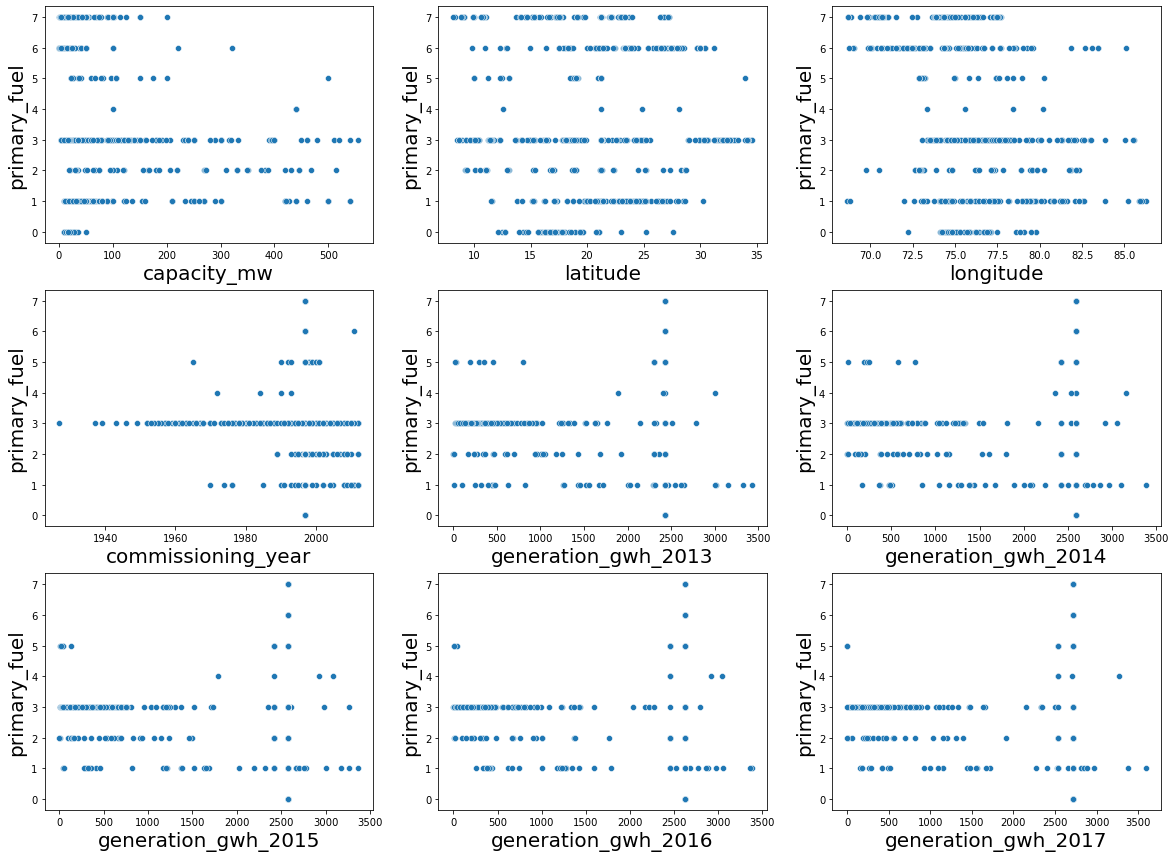

In [35]:
## checking the relationship between features and Labels using scatterplot
plt.figure(figsize = (20,20))
plt_num =1

for column in x:
    if plt_num<=10:
        sx = plt.subplot(4,3,plt_num)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('primary_fuel',fontsize = 20)
    plt_num+=1
plt.show()

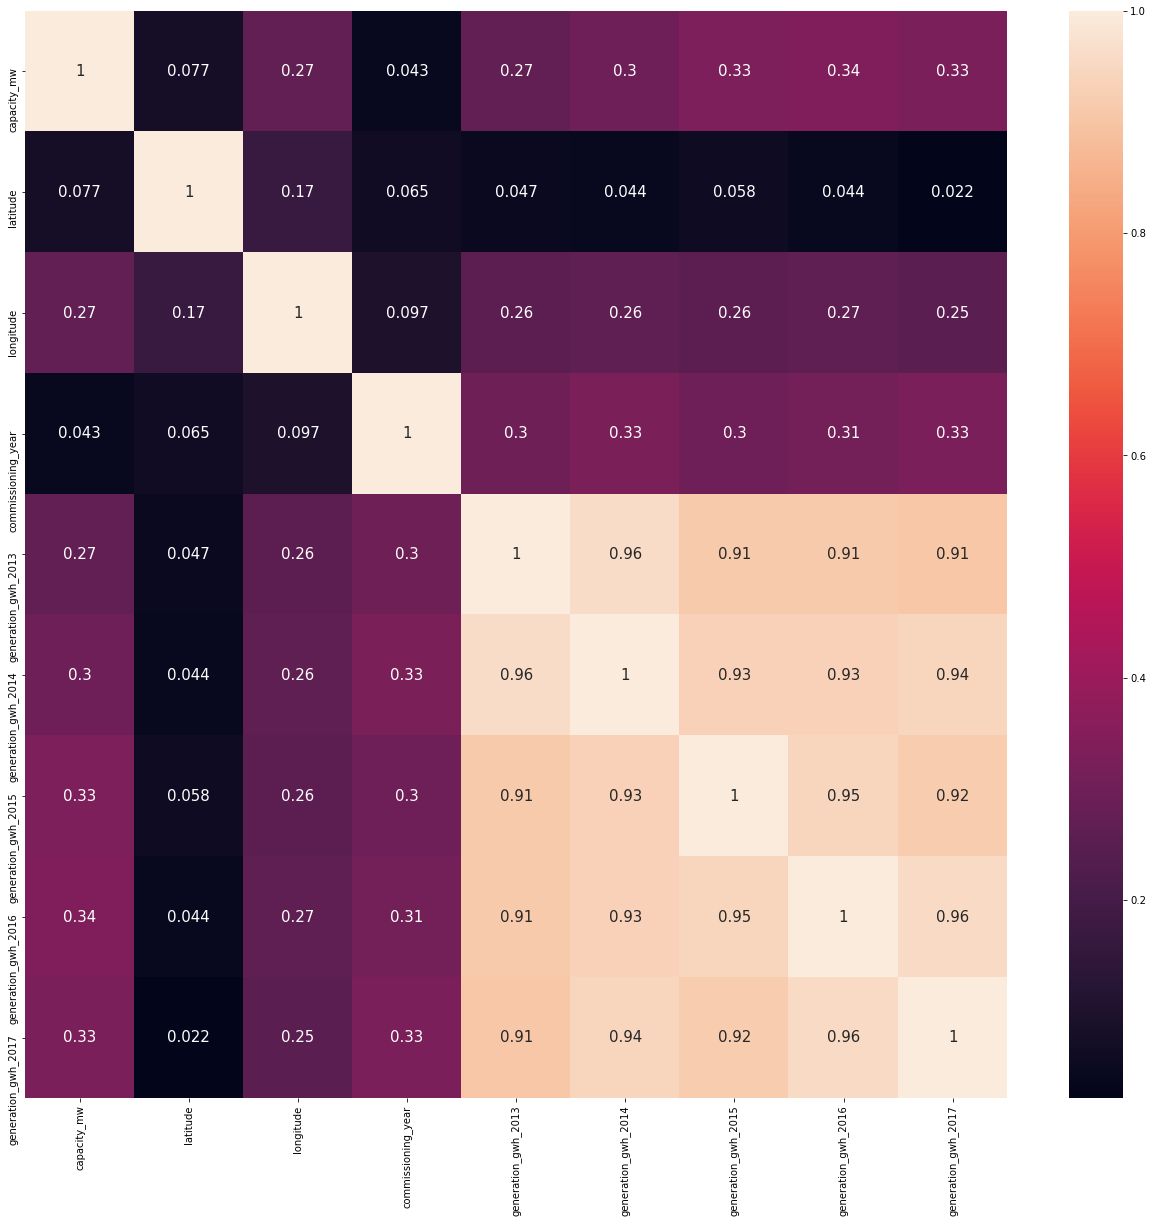

In [36]:
#finding the Co-relation between the columns using heatmap
x_corr = x.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(x_corr,annot = True,annot_kws = {'size':15})
plt.show()

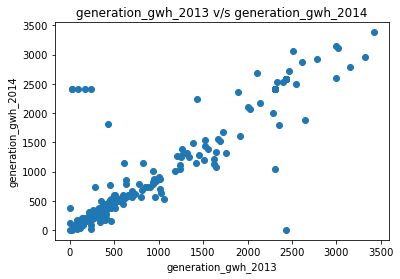

In [37]:
## plotting scatter plot to confirm co_relation between generation_gwh_2013 and generation_gwh_2014
plt.scatter(x.generation_gwh_2013,x.generation_gwh_2014)
plt.xlabel('generation_gwh_2013')
plt.ylabel('generation_gwh_2014')
plt.title('generation_gwh_2013 v/s generation_gwh_2014')
plt.show()

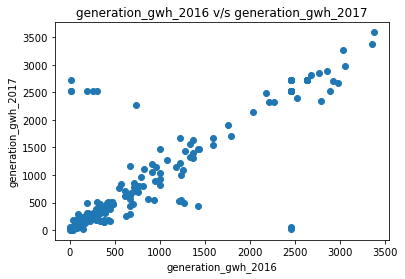

In [38]:
## plotting scatter plot to confirm co_relation between generation_gwh_2016 and generation_gwh_2017
plt.scatter(x.generation_gwh_2016,x.generation_gwh_2017)
plt.xlabel('generation_gwh_2016')
plt.ylabel('generation_gwh_2017')
plt.title('generation_gwh_2016 v/s generation_gwh_2017')
plt.show()

In [39]:
#dropping the columns which has high co_linearity
x = x.drop(columns = ['generation_gwh_2013','generation_gwh_2016'])

In [40]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.000000,2589.398336,2573.117142,2720.350162
1,98.0,24.7663,74.6090,1996.876894,2589.398336,2573.117142,2720.350162
2,39.2,21.9038,69.3732,1996.876894,2589.398336,2573.117142,2720.350162
5,250.0,23.7689,68.6447,2005.000000,1153.421000,1208.852000,1147.913000
6,60.0,10.4547,77.0078,1970.000000,157.558250,152.195200,89.629600


In [41]:
## Transforming the into standard form using StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x,y)

In [42]:
##splitting into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 355)

In [43]:
# Applying DecisonTreeClassifier Algorithm for classification problem
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
# Applying the Algorithm into training data
dtc.score(x_train,y_train)

1.0

In [45]:
# predicting the values
y_pred = dtc.predict(x_test)

In [46]:
y_pred

array([2., 1., 1., 3., 3., 3., 6., 6., 7., 7., 3., 3., 1., 4., 5., 3., 6.,
       7., 2., 7., 7., 7., 7., 0., 1., 6., 7., 7., 1., 3., 0., 3., 7., 3.,
       6., 7., 1., 3., 7., 3., 3., 6., 2., 1., 3., 4., 7., 3., 3., 1., 0.,
       7., 3., 3., 3., 7., 7., 7., 1., 1., 7., 3., 3., 3., 6., 7., 6., 5.,
       3., 0., 7., 6., 2., 3., 7., 3., 3., 6., 2., 1., 3., 3., 3., 1., 3.,
       7., 3., 3., 3., 3., 1., 3., 4., 3., 6., 7., 3., 6., 6., 3., 6., 3.,
       2., 2., 2., 6., 7., 3., 3., 6., 0., 3., 3., 3., 1., 0., 3., 2., 6.,
       7., 7., 7., 6., 6., 2., 5., 7., 6., 3., 6., 6., 2., 2., 1., 6., 3.,
       3., 3., 0., 7., 2., 7., 7., 6., 6., 0., 7., 6., 6., 7., 0., 7., 7.,
       7., 3., 6., 7., 7., 7., 3., 2., 0.])

In [47]:
#Accuracy score of DecisionTreeClassifier
accuracy_score(y_test,y_pred)

0.6975308641975309

In [48]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 8,  1,  1,  0,  0,  0,  1,  4],
       [ 1,  9,  5,  2,  0,  0,  1,  5],
       [ 0,  1,  3,  0,  0,  2,  0,  0],
       [ 0,  0,  2, 44,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  2,  4,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 23,  6],
       [ 1,  2,  1,  0,  0,  0,  3, 24]], dtype=int64)

In [49]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64        15
         1.0       0.60      0.39      0.47        23
         2.0       0.21      0.50      0.30         6
         3.0       0.88      0.92      0.90        48
         4.0       0.33      1.00      0.50         1
         5.0       0.33      0.14      0.20         7
         6.0       0.82      0.74      0.78        31
         7.0       0.62      0.77      0.69        31

    accuracy                           0.70       162
   macro avg       0.57      0.63      0.56       162
weighted avg       0.72      0.70      0.70       162



In [50]:
#Cross validation score 
cross_val_score(dtc,x_sc,y,cv = 5)

array([0.66153846, 0.70769231, 0.76153846, 0.74418605, 0.6744186 ])

In [51]:
cross_val_score(DecisionTreeClassifier(),x_sc,y,cv =5).mean()

0.7114013118664282

In [52]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [53]:
grid_search = GridSearchCV(estimator = dtc,param_grid = grid_param,cv = 5)

In [54]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [55]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [56]:
#Applying the best parameters into DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,min_samples_leaf = 4,min_samples_split = 6)

In [57]:
#Applying the best parameters into training data
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=6)

In [58]:
#predicting the values with new Parameters
y_pred = dt.predict(x_test)
y_pred

array([1., 1., 1., 3., 3., 3., 7., 7., 7., 1., 3., 3., 7., 1., 7., 3., 6.,
       7., 3., 7., 7., 1., 1., 7., 1., 7., 7., 1., 7., 3., 7., 3., 7., 3.,
       7., 7., 1., 3., 7., 3., 1., 6., 3., 1., 3., 1., 1., 3., 3., 1., 1.,
       1., 3., 3., 3., 1., 7., 7., 7., 1., 1., 3., 3., 3., 7., 7., 7., 3.,
       3., 7., 7., 7., 3., 3., 1., 3., 3., 6., 1., 1., 3., 3., 3., 1., 3.,
       7., 3., 3., 3., 3., 1., 3., 1., 3., 6., 1., 3., 6., 7., 3., 6., 3.,
       7., 3., 3., 6., 7., 3., 3., 7., 7., 3., 3., 3., 7., 7., 3., 3., 7.,
       7., 7., 1., 7., 1., 3., 7., 7., 7., 3., 7., 7., 1., 3., 1., 6., 3.,
       3., 3., 7., 7., 3., 1., 7., 7., 6., 7., 1., 6., 6., 1., 7., 7., 7.,
       7., 3., 7., 1., 7., 1., 3., 3., 7.])

In [59]:
accuracy_score(y_test,y_pred)

0.5061728395061729

In [60]:
# Using KNeighborsClasssifer Algorithm for classification problem
knn = KNeighborsClassifier()

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
#predicting the data using KNeighborsClasssifer
y_pred = knn.predict(x_test)
y_pred

array([7., 1., 1., 7., 3., 3., 7., 1., 7., 7., 3., 3., 1., 1., 5., 3., 6.,
       7., 1., 6., 7., 7., 7., 0., 1., 7., 1., 7., 1., 3., 7., 2., 7., 7.,
       0., 6., 1., 3., 7., 3., 3., 6., 2., 1., 3., 1., 7., 3., 3., 6., 0.,
       7., 3., 3., 3., 7., 1., 7., 1., 1., 7., 7., 3., 3., 1., 7., 6., 3.,
       3., 7., 7., 6., 1., 5., 7., 3., 3., 6., 3., 2., 0., 7., 3., 2., 3.,
       0., 3., 7., 3., 3., 7., 7., 1., 3., 6., 1., 3., 6., 6., 3., 6., 3.,
       7., 1., 2., 6., 7., 1., 3., 6., 0., 3., 3., 3., 1., 0., 3., 1., 1.,
       7., 7., 7., 6., 7., 1., 5., 7., 6., 3., 7., 0., 2., 1., 1., 6., 1.,
       3., 3., 0., 0., 2., 7., 7., 6., 6., 0., 7., 6., 6., 7., 0., 6., 7.,
       0., 3., 7., 7., 7., 0., 3., 2., 1.])

In [63]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 9,  2,  0,  0,  0,  0,  0,  4],
       [ 0, 15,  1,  2,  0,  0,  2,  3],
       [ 0,  1,  2,  2,  0,  1,  0,  0],
       [ 1,  4,  3, 35,  0,  1,  0,  4],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  2,  0,  1,  0,  2],
       [ 3,  3,  0,  0,  0,  0, 20,  5],
       [ 1,  2,  1,  0,  0,  0,  0, 27]], dtype=int64)

In [64]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62        15
         1.0       0.52      0.65      0.58        23
         2.0       0.25      0.33      0.29         6
         3.0       0.85      0.73      0.79        48
         4.0       0.00      0.00      0.00         1
         5.0       0.33      0.14      0.20         7
         6.0       0.91      0.65      0.75        31
         7.0       0.60      0.87      0.71        31

    accuracy                           0.67       162
   macro avg       0.51      0.50      0.49       162
weighted avg       0.70      0.67      0.67       162



In [65]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

0.6728085867620751

In [66]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [7,9,11,13,15],'n_neighbors' : [3,5,7,9,11,23]}

In [67]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_neighbors': 5}

In [68]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3 , n_neighbors = 2)

In [69]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=2)

In [70]:
#Predicting the values
y_pred = knn.predict(x_test)
y_pred

array([7., 1., 1., 7., 3., 3., 7., 0., 6., 0., 3., 3., 1., 3., 5., 3., 6.,
       7., 1., 6., 7., 1., 7., 0., 1., 7., 1., 1., 1., 3., 7., 2., 7., 5.,
       0., 6., 1., 3., 7., 3., 2., 6., 2., 1., 3., 3., 0., 3., 3., 1., 0.,
       7., 2., 1., 3., 7., 1., 6., 0., 1., 7., 3., 3., 3., 0., 7., 6., 2.,
       3., 0., 7., 6., 1., 1., 7., 3., 3., 6., 2., 1., 0., 3., 3., 5., 3.,
       0., 3., 7., 3., 3., 7., 6., 1., 3., 6., 1., 3., 6., 6., 3., 6., 3.,
       7., 1., 2., 6., 6., 0., 3., 6., 3., 3., 3., 3., 1., 0., 3., 4., 1.,
       7., 7., 7., 6., 7., 1., 5., 7., 6., 3., 0., 0., 2., 1., 1., 6., 1.,
       3., 3., 0., 7., 2., 7., 7., 6., 6., 0., 7., 6., 6., 0., 0., 6., 7.,
       0., 3., 1., 0., 7., 0., 3., 3., 1.])

In [71]:
#confusion matrix after hyperparameter tunning
cf = confusion_matrix(y_test,y_pred)
cf

array([[11,  0,  0,  1,  0,  0,  0,  3],
       [ 3, 16,  1,  1,  1,  0,  1,  0],
       [ 0,  1,  4,  0,  0,  1,  0,  0],
       [ 2,  3,  3, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  2,  0,  2,  1,  0],
       [ 5,  3,  0,  0,  0,  0, 21,  2],
       [ 1,  4,  0,  0,  0,  1,  2, 23]], dtype=int64)

In [72]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.73      0.59        15
         1.0       0.55      0.70      0.62        23
         2.0       0.44      0.67      0.53         6
         3.0       0.90      0.79      0.84        48
         4.0       0.00      0.00      0.00         1
         5.0       0.50      0.29      0.36         7
         6.0       0.84      0.68      0.75        31
         7.0       0.77      0.74      0.75        31

    accuracy                           0.71       162
   macro avg       0.56      0.57      0.56       162
weighted avg       0.74      0.71      0.72       162



In [73]:
#splitting the dataset into features and labels for regression problem
p = df_new.drop(columns = ['capacity_mw','generation_gwh_2013','generation_gwh_2016'])
q = df_new['capacity_mw']

In [74]:
p

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,28.1839,73.2407,6.0,2011.000000,2589.398336,2573.117142,2720.350162
1,24.7663,74.6090,1.0,1996.876894,2589.398336,2573.117142,2720.350162
2,21.9038,69.3732,7.0,1996.876894,2589.398336,2573.117142,2720.350162
5,23.7689,68.6447,1.0,2005.000000,1153.421000,1208.852000,1147.913000
6,10.4547,77.0078,3.0,1970.000000,157.558250,152.195200,89.629600
...,...,...,...,...,...,...,...
902,13.1156,77.5838,5.0,1993.000000,2420.393316,2414.072373,2720.350162
904,12.8932,78.1654,6.0,1996.876894,2589.398336,2573.117142,2720.350162
905,15.2758,75.5811,7.0,1996.876894,2589.398336,2573.117142,2720.350162
906,24.3500,73.7477,1.0,1996.876894,2589.398336,2573.117142,2720.350162


In [75]:
q

0        2.5
1       98.0
2       39.2
5      250.0
6       60.0
       ...  
902    106.6
904      3.0
905     25.5
906     80.0
907     16.5
Name: capacity_mw, Length: 648, dtype: float64

In [76]:
#Transforming the dataset into standard form using StandardScaler 
scaler = StandardScaler()
x_scaler = scaler.fit_transform(p)

In [77]:
#splitting the data into training and testing 
p_train,p_test,q_train,q_test =  train_test_split(x_scaler,q,test_size = 0.25,random_state = 435)

In [78]:
#Using KNeighborsRegressor for regression problem
kn = KNeighborsRegressor()
kn.fit(p_train,q_train)

KNeighborsRegressor()

In [79]:
#predicting the value
q_pred = kn.predict(p_test)
q_pred

array([ 58.72      ,  22.        ,  87.4       ,   4.2       ,
        73.4       , 132.8       ,   6.        ,  12.4       ,
        44.6       ,  22.35      ,  18.192     ,  53.28      ,
        11.4       , 181.68      ,  22.35      ,   2.6       ,
         7.44      ,  92.6       , 114.5       ,   8.64      ,
        58.1       ,  63.84      , 110.        ,  11.26      ,
        80.6       ,  10.35      ,  96.076     , 184.8       ,
         5.        ,  25.04      ,   9.        ,  22.35      ,
        20.5       ,  45.84      ,  68.82927555, 132.8       ,
        21.65      ,  42.08      ,  55.28      ,  22.74      ,
       108.45      , 104.88      , 226.2       ,  69.4       ,
        18.64      ,  50.1       ,  22.4       ,  28.51      ,
        44.33      ,  23.94      , 162.1       , 257.        ,
        35.46      , 108.8       ,  19.352     , 130.32927555,
        15.26      ,  45.68      ,  24.1       , 101.23      ,
        38.46      ,   4.36      ,  23.46      ,  17.4 

In [80]:
#model Score
kn.score(p_test,q_test)

0.4430603067115786

In [81]:
#Using Another Algorithm for Regression DecisionTreeRegresssor
dtr = DecisionTreeRegressor()
dtr.fit(p_train,q_train)

DecisionTreeRegressor()

In [82]:
#predicting the value
q_pred = dtr.predict(p_test)
q_pred

array([ 75.        ,   1.        ,  21.        ,   5.        ,
       120.        , 180.        ,   5.        ,  21.        ,
        50.4       ,  50.        ,  12.96      ,  63.5       ,
         9.        , 250.        ,  50.        ,   1.        ,
        50.        ,  33.        ,  32.5       ,  22.5       ,
        21.        ,  45.        ,  94.2       ,   5.        ,
        32.        , 480.        , 205.24      , 160.        ,
         5.        ,  12.        ,  15.        ,  30.5       ,
        22.        ,  38.5       ,   5.        , 120.        ,
        37.5       ,  50.4       ,  30.6       ,  18.9       ,
        32.        ,  20.        ,  36.        ,  30.        ,
        25.        ,  70.        ,  22.        ,  91.8       ,
        10.        ,  18.9       , 440.        ,  41.4       ,
        40.        ,  80.        ,  12.96      , 120.        ,
        10.        ,  29.        ,  24.        ,  62.4       ,
        49.6       ,  20.        ,  28.        ,  15.  

In [83]:
#model Score
dtr.score(p_test,q_test)

0.5679744875134443

In [84]:
## For Classification problems:
                               ## used DecisionTreeClassifier it got 72% Accuracy
                               ## Used KNNeighborsClassifier it got 71% Accuracy
        
## for Regression problems:
                                ## used DecisionTreeClassifier it got 44% Accuracy
                                 ## used KNNeighborsRegressor  it got 56% Accuracy 
##Note : For regression it overfitting need to "ignored" , Already remove more columns 